# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### McCormick function 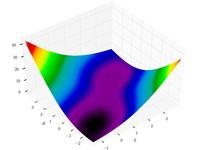

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def McCormickF(x):
    return np.sin(x[0]+x[1]) + np.power(x[0]-x[1], 2) - 1.5*x[0]+2.5*x[1]+1

bounds = [(-1.5, 4), (-3, 4)]

strategies = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp',
              'best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

for st in strategies:
    res = differential_evolution(McCormickF,bounds,seed=42, strategy=st)
    print(f'strategy {st}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')

strategy best1bin:
 min: -1.9132229549452981, min point: [-0.54719302 -1.547193  ] in 9 operations

strategy best1exp:
 min: -1.913222954981031, min point: [-0.54719749 -1.54719752] in 13 operations

strategy rand1exp:
 min: -1.9132229549484934, min point: [-0.54719322 -1.54719321] in 22 operations

strategy randtobest1exp:
 min: -1.9132229549737003, min point: [-0.5471955  -1.54719549] in 14 operations

strategy currenttobest1exp:
 min: -1.9132229549783242, min point: [-0.54719631 -1.54719629] in 19 operations

strategy best2exp:
 min: -1.9132229549795934, min point: [-0.54719665 -1.54719662] in 22 operations

strategy rand2exp:
 min: -1.913222954975533, min point: [-0.54719577 -1.54719577] in 27 operations

strategy randtobest1bin:
 min: -1.9132229549810358, min point: [-0.54719756 -1.54719753] in 10 operations

strategy currenttobest1bin:
 min: -1.9132229549810362, min point: [-0.54719756 -1.54719755] in 12 operations

strategy best2bin:
 min: -1.9132229549809119, min point: [-0.547

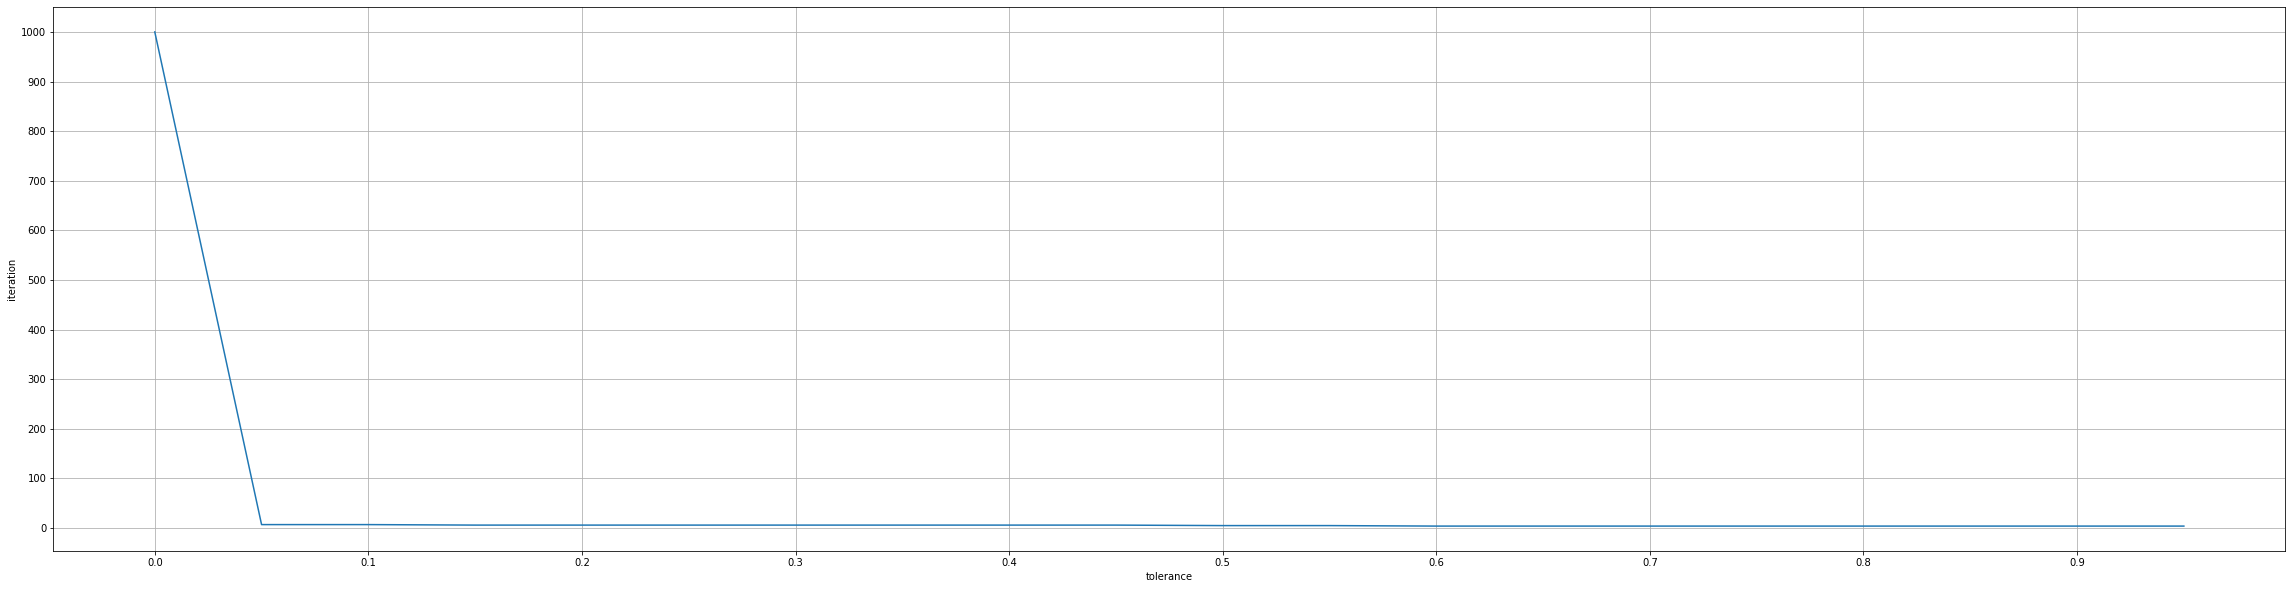

In [17]:
x = []
y = []

for t in np.arange(0.00,1,0.05):
    res = differential_evolution(McCormickF,bounds,seed=42, tol=t)
#     print(f'relative tolerance {t}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')
    x.append(t)
    y.append(res.nit)

plt.rcParams["figure.figsize"] = (40,10)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.xlabel("tolerance")
plt.ylabel("iteration")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

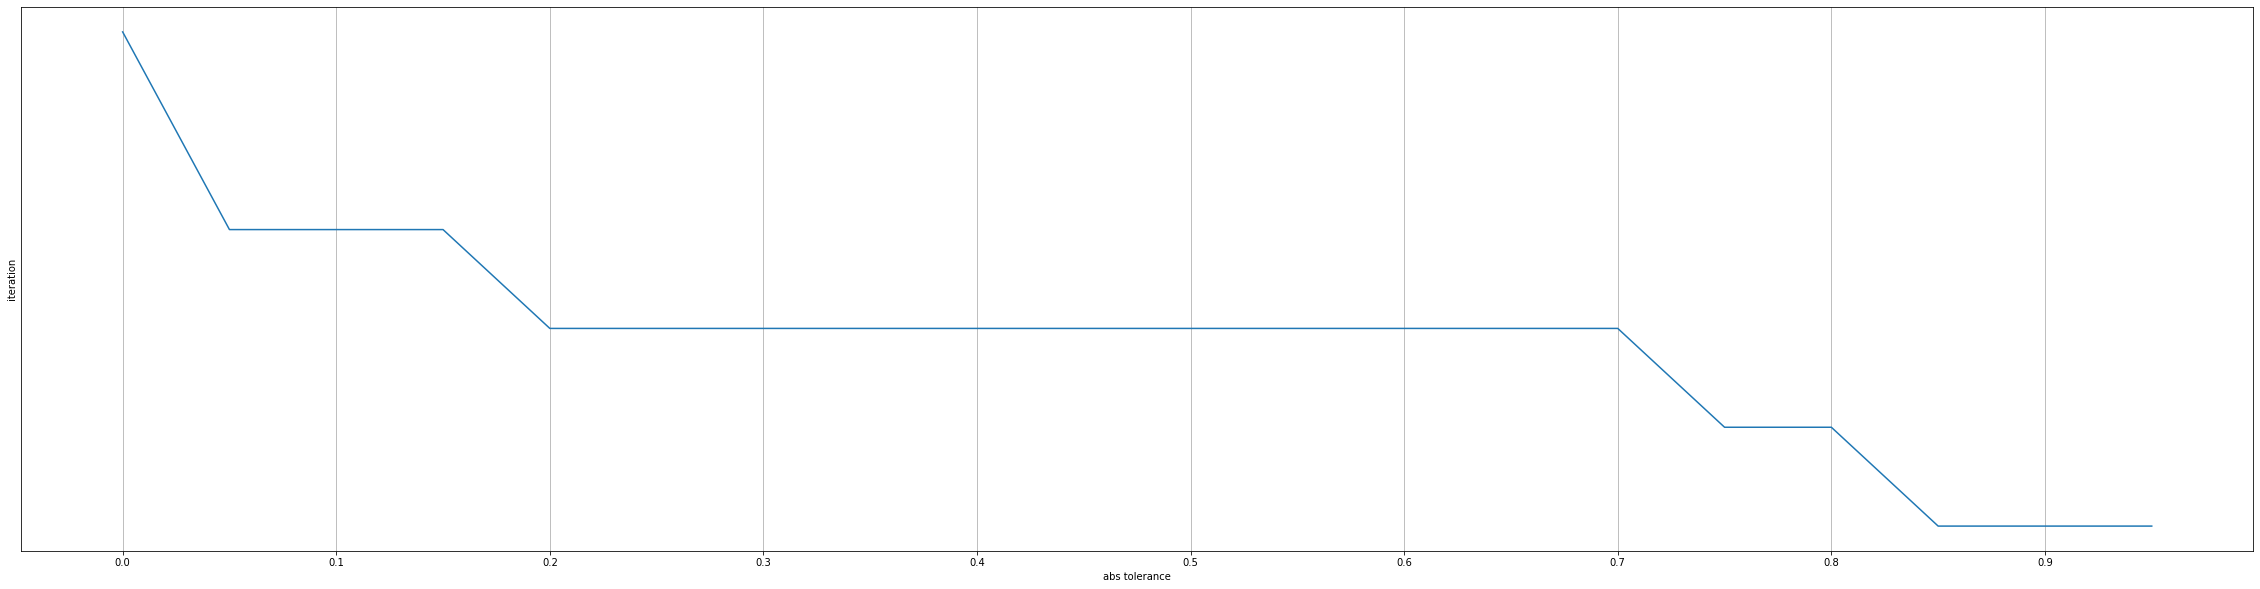

In [16]:
x = []
y = []
for at in np.arange(0.00,1,0.05):
    res = differential_evolution(McCormickF,bounds,seed=42, atol=at)
#     print(f'absolute tolerance {at}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')
    x.append(at)
    y.append(res.nit)

plt.rcParams["figure.figsize"] = (40,10)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.xlabel("abs tolerance")
plt.ylabel("iteration")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

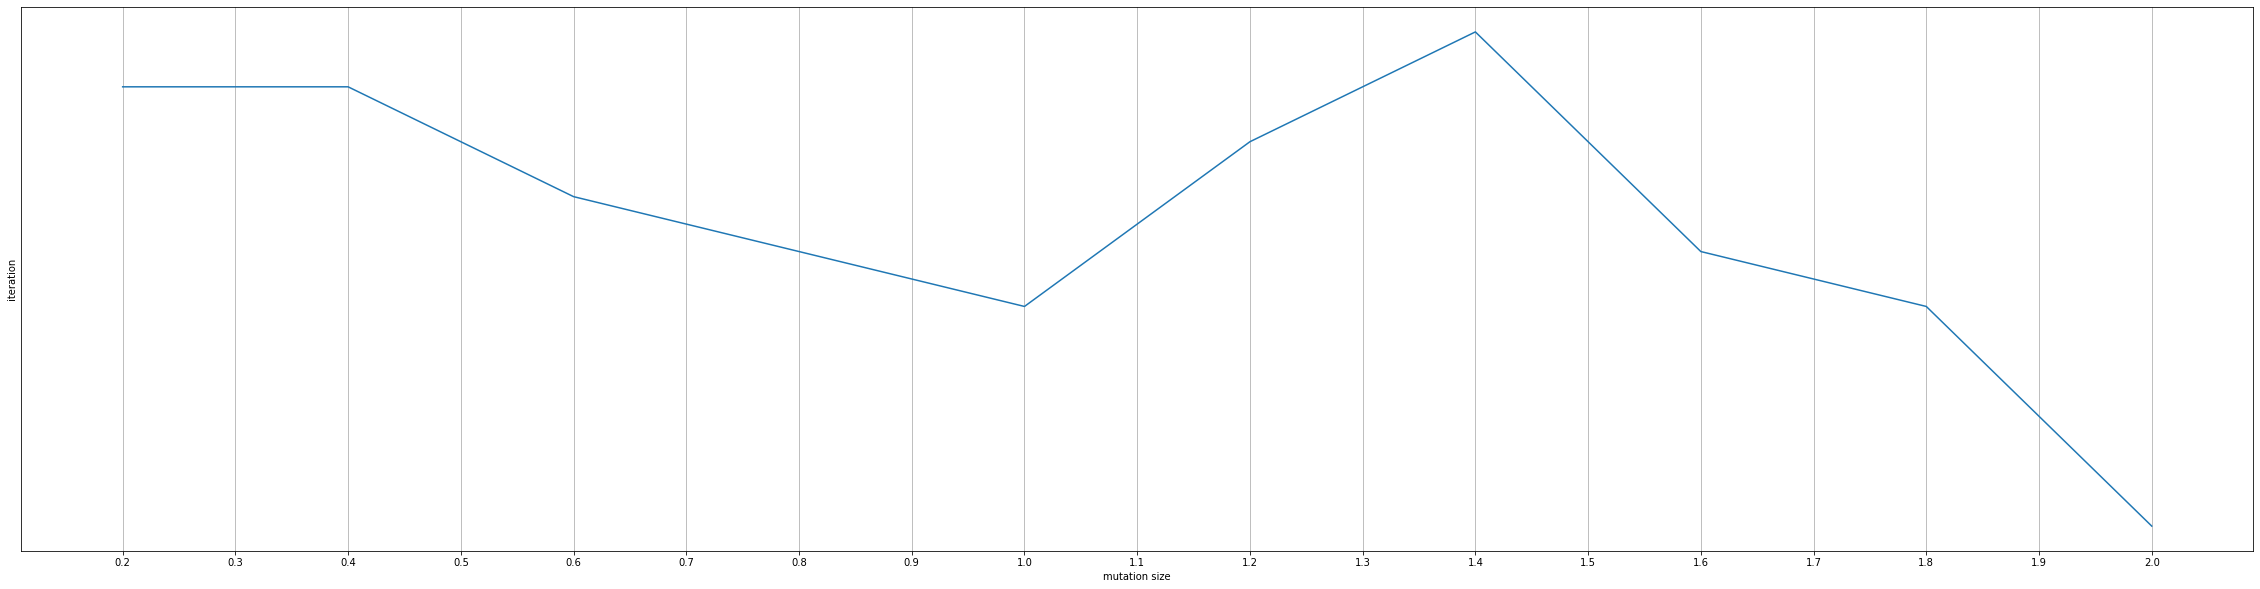

In [15]:
x = []
y = []
mut = [1,1]
while mut[0] >= 0 and mut[1] <= 2:
    res = differential_evolution(McCormickF,bounds,seed=42, mutation=tuple(mut))
#     print(f'mutation {tuple(mut)}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')
    mut[0] = mut[0] -0.1
    mut[1] = mut[1] + 0.1
    x.append(mut[1]-mut[0])
    y.append(res.nit)

plt.rcParams["figure.figsize"] = (40,10)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.xlabel("mutation size")
plt.ylabel("iteration")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

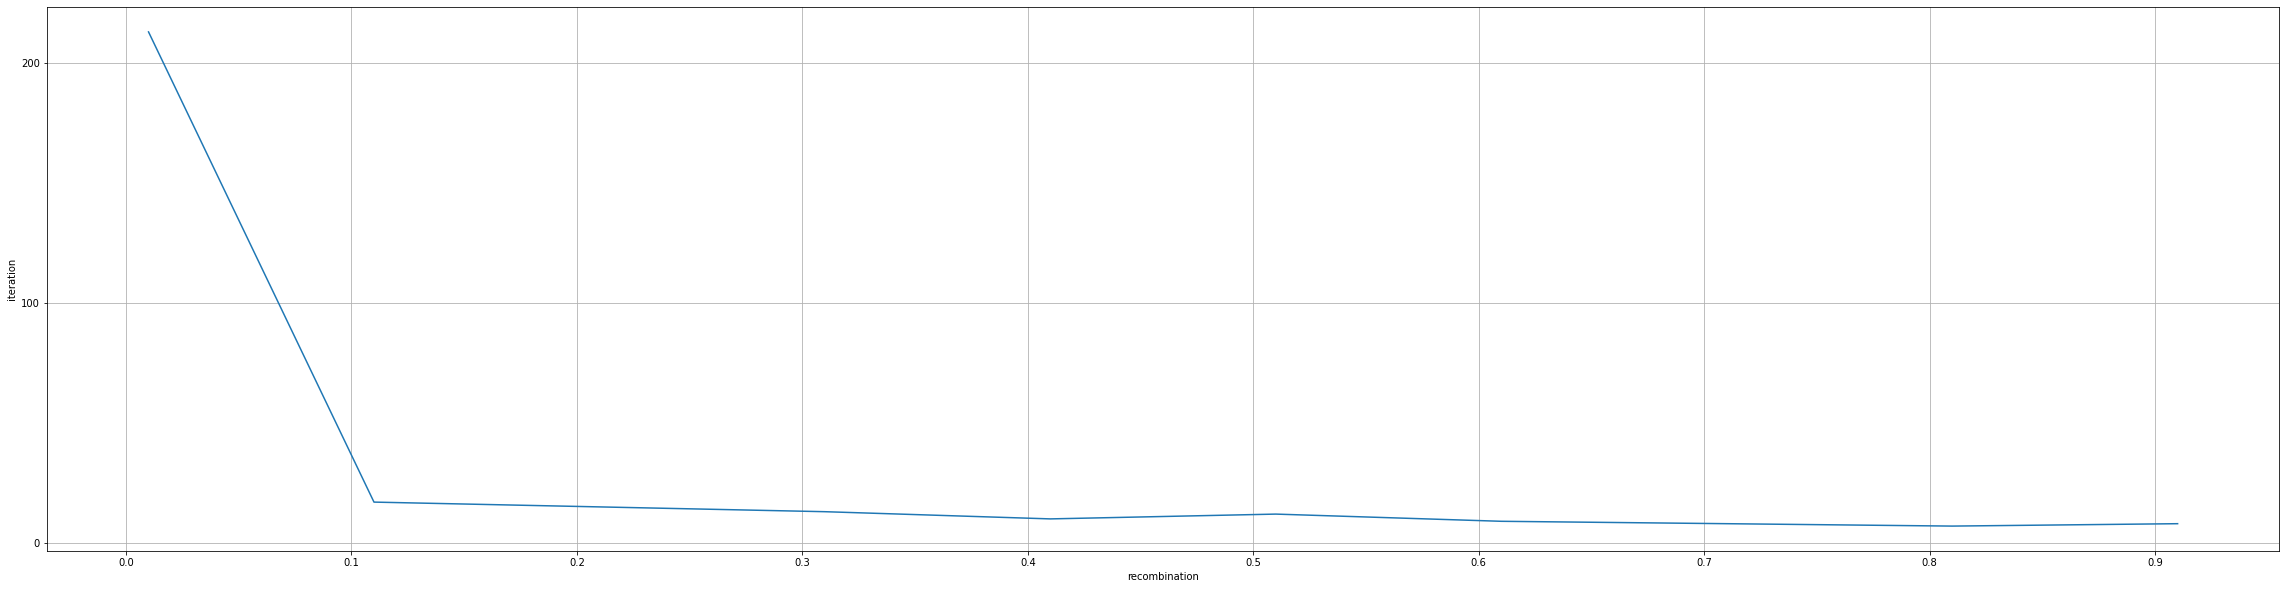

In [18]:
x = []
y = []
for rc in np.arange(0.01,1,0.1):
    res = differential_evolution(McCormickF,bounds,seed=42, recombination = rc)
#     print(f'recombination {rc}:\n min: {res.fun}, min point: {res.x} in {res.nit} operations\n')
    x.append(rc)
    y.append(res.nit)

plt.rcParams["figure.figsize"] = (40,10)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid()
plt.xlabel("recombination")
plt.ylabel("iteration")
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

#### Вывод

Стратегий ограниченное кол-во и вероятно нужно подбирать под каждую ф-цию наиболее оптимальную. Разное кол-во итераций

Размер популяции не сильно влияет на количество итераций

Абсолютная и относительные толерантности обратно пропорциональны количеству итераций

Мутация значительно сокращает кол-во итераций чем она шире

Доля рекомбинаций обратно пропорциональна количеству итераций


Везде расхождение результатов незначительное

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

#### Ackley function 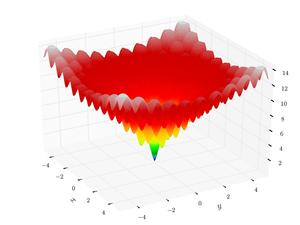

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = {}


strategies = ['best1bin','best1exp','rand1exp','randtobest1exp',
              'best2exp','rand2exp','randtobest1bin','best2bin','rand2bin','rand1bin']

upd = 'immediate' # эффективнее deferred с воркерами
m = (0,1.99)
rc = 1

for st in strategies:
    for ps in range(50,75,1):
        res = differential_evolution(ackley,bounds,seed=42,
                                    strategy=st, popsize=ps, mutation=m, recombination=rc, updating=upd)
        result[f'strategy={st}, popsize={ps}, mutation={m}, recombination={rc}, updating={upd}'] = res.nit


In [33]:
minval = min(result.values())

for key, value in result.items():
    if value == minval:
        print(key)

strategy=best2exp, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate
strategy=best2bin, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate


#### Вывод

Методом массовых циклов и выкручивания пропорциональных ключей в крайние положения было определено, что минимальное количество итераций, а именно 4, достигаются при следующих параметрах:

* strategy=best2bin, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate, iter=4
* strategy=best2exp, popsize=54, mutation=(0, 1.99), recombination=1, updating=immediate, iter=4
